# Unsupervised Topic Modeling 

### Data Analysis

In [1]:
# Read csv file and dsiplay first 5 reviews
import pandas as pd

data = pd.read_csv('./data.csv')
data.head(5)

,text
0,Tires where delivered to the garage of my choi...
1,"Easy Tyre Selection Process, Competitive Prici..."
2,Very easy to use and good value for money.
3,Really easy and convenient to arrange
4,It was so easy to select tyre sizes and arrang...


Firstly, let's have a look at the shape of our dataframe, i.e, the number of reviews given to us to work with. We will also make use of the describe() function provided by pandas to get a basic idea of our data. We will also check to see if the data has any null values so we can discard them right away. 

In [2]:
print("Shape:", data.shape)
print("Dataframe description:", data.describe())
print("Null Values:", data.isnull().sum())

Shape: (10132, 1)
Dataframe description:                                                      text
count                                               10132
unique                                              10132
top     Tires where delivered to the garage of my choi...
freq                                                    1
Null Values: text    0
dtype: int64


Now that we've had a look at some of the basics, we can compute things such as the average length of our data and largest sentence, smallest sentence etc.

In [3]:
avg_len = 0
max_len = len(data['text'][0])
min_len = len(data['text'][0])

for i in range(len(data)):
    
    avg_len += len(data['text'][i])
    
    if max_len<len(data['text'][i]):
        max_len = len(data['text'][i])
        
    if min_len>len(data['text'][i]):
        min_len = len(data['text'][i])
        
print("Average Length of a review:", avg_len/len(data))
print("Maximum Length of a review:", max_len)
print("Minimum Length of a review:", min_len)

Average Length of a review: 126.78947887879984
Maximum Length of a review: 3553
Minimum Length of a review: 1


Now, we can plot a simple wordcloud to get a brief idea of our data and the most dominant words in our dataset. This might help us get an idea of what kind of keywords we're looking for while trying to decide on topics to segregate our data into.

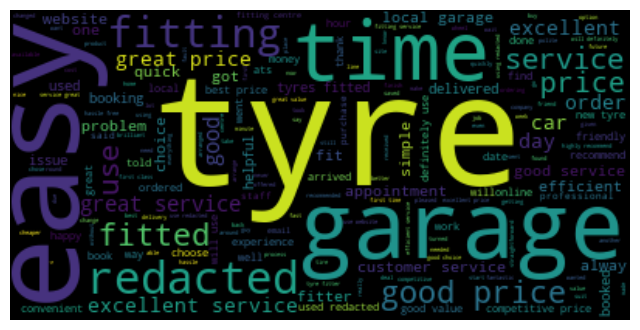

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

text = data['text'].tolist() 

text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

As is clear from the word cloud, words like easy, fitting, time, tyre, garage, redacted, excellent service etc are quite frequent. This is in line with the fact our reviews are garage reviews. On manual inspection, we see that the word 'redacted' is surrounded by square brackets. It has essentially been used in places to hide sensitive information. This will be addressed later.

With this, we get some sort of an idea of the kind of data we're working with. Now that we've completed basic data analysis, we can move to the unsupervised labeling part of the problem.